Это код реализации выпускной контрольной работы по теме 

«‎Распознавание рака груди нейросетевыми методами»‎

Ссылка на репозиторий: https://github.com/tyugv/Breast-cancer-detection-using-neural-networks

Ячейка ниже загружает все необходимые библиотеки.

In [1]:
!pip install torchmetrics
import torchmetrics
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

В случае, если у вас есть пять zip-файлов с данными, можно загрузить их в файловую систему и перейти сразу же к третьему пункту.

# Kaggle

При помощи токена, полученного на платформе Kaggle скачиваем данные.

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d 'paultimothymooney/breast-histopathology-images'

In [ ]:
!unzip '/content/breast-histopathology-images' -d '/content/dataset'

# Разложить датасет по папкам


Полученный датасет необходимо распределить по четырем папкам для кросс-валидации.

In [ ]:
from shutil import copyfile
import os

In [ ]:
files = os.listdir('/content/dataset/')

In [ ]:
!mkdir '/content/0'
!mkdir '/content/1'
!mkdir '/content/2'
!mkdir '/content/3'
!mkdir '/content/4'

Разложим по пяти директориям файлы с положительным диагнозом.

In [ ]:
z_num = 0
for folder in files:
  src = '/content/dataset/' + folder + '/1'
  part = z_num // 6000
  dst = '/content/' + str(part)
  if '1' not in os.listdir(dst):
    os.mkdir(dst +'/1')
  dst = dst + '/1/'
  for im in os.listdir(src):
    if im not in os.listdir(dst):
      copyfile(src + '/' + im, dst + im)
    z_num += 1
    if z_num % 40 == 0:
      print(z_num)
    if (z_num // 6000) > part:
      part += 1
      dst = '/content/' + str(part)
      if '1' not in os.listdir(dst):
        os.mkdir(dst +'/1')
      dst = dst + '/1/'
    if z_num == 30000:
      break

Разложим по пяти директориям файлы с отрицательным диагнозом.

In [ ]:
z_num = 0
for folder in files:
  src = '/content/dataset/' + folder + '/0'
  part = z_num // 6000
  dst = '/content/' + str(part)
  if '0' not in os.listdir(dst):
    os.mkdir(dst +'/0')
  dst = dst + '/0/'
  for im in os.listdir(src):
    if im not in os.listdir(dst):
      copyfile(src + '/' + im, dst + im)
    z_num += 1
    if z_num % 40 == 0:
      print(z_num)
    if (z_num // 6000) > part:
      part += 1
      dst = '/content/' + str(part)
      if '0' not in os.listdir(dst):
        os.mkdir(dst +'/0')
      dst = dst + '/0/'
    if z_num == 30000:
      break

Для эффективного дальнейшего использования данных заархивируем их в четыре zip-файла. Полученные данные будут лежать в репозитории Github.

In [ ]:
cd '/content/histopathology_dataset/'

In [ ]:
!zip -r '0.zip' '0' 
!zip -r '1.zip' '1' 
!zip -r '2.zip' '2' 
!zip -r '3.zip' '3' 

In [ ]:
cd /content

/content


# Выгрузить датасет из zip-файлов


Разархивируем zip-файлы в случае, если пропущен предыдущий пункт.

In [ ]:
!unzip '/content/0.zip'
!unzip '/content/1.zip'
!unzip '/content/2.zip'
!unzip '/content/3.zip'

строчки ниже удалить

In [1]:
!mkdir histopathology_dataset

In [2]:
!cp '/content/drive/MyDrive/диплом/histopathology_dataset/0.zip' '/content/histopathology_dataset'
!cp '/content/drive/MyDrive/диплом/histopathology_dataset/1.zip' '/content/histopathology_dataset'
!cp '/content/drive/MyDrive/диплом/histopathology_dataset/2.zip' '/content/histopathology_dataset'
!cp '/content/drive/MyDrive/диплом/histopathology_dataset/3.zip' '/content/histopathology_dataset'
!cp '/content/drive/MyDrive/диплом/histopathology_dataset/4.zip' '/content/histopathology_dataset'

In [ ]:
!unzip '/content/histopathology_dataset/0.zip'
!unzip '/content/histopathology_dataset/1.zip'
!unzip '/content/histopathology_dataset/2.zip'
!unzip '/content/histopathology_dataset/3.zip'
!unzip '/content/histopathology_dataset/4.zip'

# Составление датасетов

In [2]:
data_transform = transforms.Compose([
        transforms.CenterCrop(50),
        transforms.ToTensor(),
    ])

In [39]:
dataset0 = datasets.ImageFolder(root='/content/0/',  transform = data_transform)
dataset1 = datasets.ImageFolder(root='/content/1/',  transform = data_transform)
dataset2 = datasets.ImageFolder(root='/content/2/',  transform = data_transform)
dataset3 = datasets.ImageFolder(root='/content/3/',  transform = data_transform)
test_dataset = datasets.ImageFolder(root='/content/4/',  transform = data_transform)

# Визуализация данных

In [8]:
loader = torch.utils.data.DataLoader(dataset1, batch_size=10, shuffle=True)

torch.Size([10, 3, 50, 50])


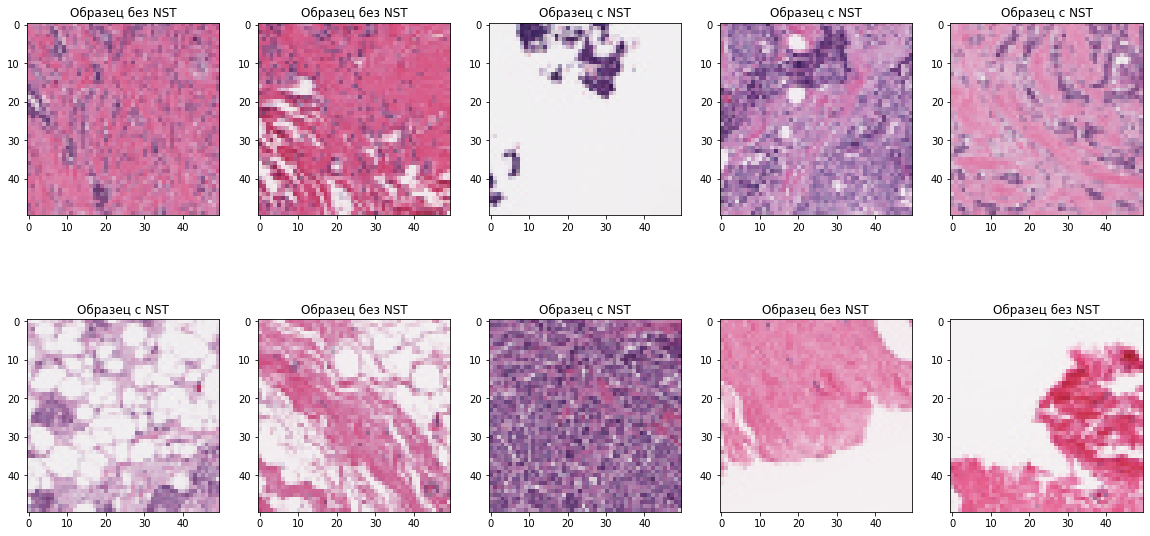

In [9]:
to_im = transforms.ToPILImage()

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for images, target in loader:
  print(images.shape)
  for i, (x, y) in enumerate(zip(images, target)):
    image = to_im(x)
    axes[i//5, i%5].imshow(np.asarray(image))
    if y.item():
      axes[i//5, i%5].set_title('Образец с NST')
    else:
      axes[i//5, i%5].set_title('Образец без NST')
  break

In [11]:
loader = torch.utils.data.DataLoader(dataset0, batch_size=5, shuffle=True)

In [10]:
def random(x, mx=0.2):
    r = torch.randn(x.size())
    r = r / torch.max(r)
    return r * mx

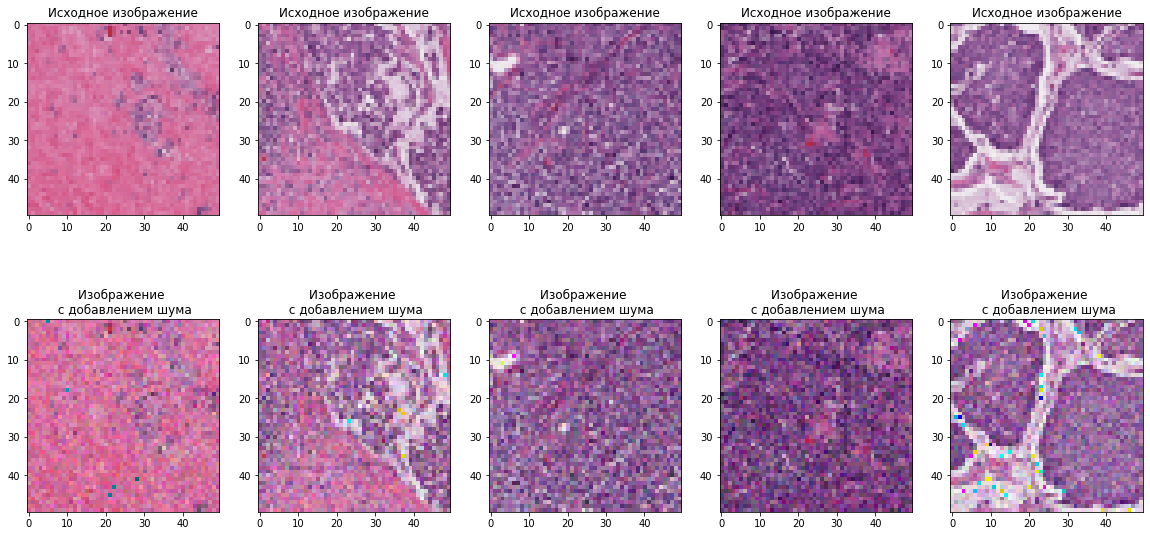

In [14]:
to_im = transforms.ToPILImage()

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for images, target in loader:
  for i, x in enumerate(images):
    image = to_im(x)
    rand_image = to_im(x + random(x))
    axes[0, i].imshow(np.asarray(image))
    axes[0, i].set_title('Исходное изображение')
    axes[1, i].imshow(np.asarray(rand_image))
    axes[1, i].set_title('Изображение \n с добавлением шума')
  break

# Модели

Ниже представлены архитектуры моделей, реализованные в процессе работы, основанные на классических архитектурах LeNet и AlexNet.

LeNet

In [15]:
class LeNet(nn.Module):
  def __init__(self):

    super(LeNet, self).__init__()
    self.conv_head = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=18, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(18),

        nn.Conv2d(in_channels=18, out_channels=36, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(36),

        nn.Conv2d(in_channels=36, out_channels=48, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(48),

        nn.Conv2d(in_channels=48, out_channels=54, kernel_size=3, stride=1),
        nn.Tanh(),
    )

    self.linear_tail = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=54 * 1 * 1, out_features=32),
        nn.Tanh(),
        nn.Linear(in_features=32, out_features=16),
        nn.Tanh(),
        nn.Linear(in_features=16, out_features=2),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.linear_tail(self.conv_head(x))

Alexnet

In [4]:
class AlexNet(nn.Module):
  def __init__(self):
    super(AlexNet, self).__init__()
    self.conv_head = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=5, stride=2, padding=4),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(16),
 
        nn.Conv2d(16, 32, kernel_size=4, stride=1, padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(32),
 
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(64),
 
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(64),
 
        nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
 
    self.linear_tail = nn.Sequential(
        nn.Flatten(),
 
        nn.Dropout(0.7),
        nn.Linear(in_features=32 * 4 * 4, out_features=32),
        nn.ReLU(),
 
        nn.Dropout(0.7),
        nn.Linear(in_features=32, out_features=16),
        nn.ReLU(),
 
        nn.Linear(in_features=16, out_features=2),
        nn.Sigmoid()
    )
 
  def forward(self, x):
    return self.linear_tail(self.conv_head(x))

# Обучение

В зависимости от режима кросс-валидации составляем тренировочный и валидационный датасеты.

In [19]:
train_dataset = torch.utils.data.ConcatDataset((dataset0, dataset1, dataset2))
val_dataset = dataset3
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=True)

Для обучения модели используются функции в следующей ячейке.

In [20]:
accuracy = torchmetrics.Accuracy().cuda()
rot = torch.rot90

def random(x, mx=0.2):
    r = torch.normal(0.0, 1.0, size=x.size()).cuda()
    r = r / torch.max(r)
    return r * mx

def train(model, optimizer, loss_fn):
  model.train()
  losses = []
  accs = []
  for x, target in train_loader:
    optimizer.zero_grad()
    x = x.cuda()
    target = target.cuda()

    pred = model(x)
    loss = loss_fn(pred, target)
    acc = accuracy(torch.argmax(pred, 1), target).item()
    loss.backward()

    noise_pred = model(x + random(x))
    noise_loss = loss_fn(noise_pred, target)
    noise_loss.backward()

    k = int(np.random.choice([-1, 1, 2]))
    rotate_pred = model(rot(x, k, [2, 3]))
    rotate_loss = loss_fn(rotate_pred, target)
    rotate_loss.backward()

    optimizer.step()
    losses.append(loss.item())
    accs.append(acc)
    del loss
    del noise_loss
    del rotate_loss
  return np.mean(losses), np.mean(accs)

def validation(model, loss_fn):
  model.eval()
  losses = []
  accs = []
  for x, target in val_loader:
    x = x.cuda()
    target = target.cuda()
    pred = model(x)
    loss = loss_fn(pred, target)
    acc = accuracy(torch.argmax(pred, 1), target).item()
    losses.append(loss.item())
    accs.append(acc)
  return np.mean(losses), np.mean(accs)

Определим параметры обучения.

In [21]:
loss_fn = torch.nn.CrossEntropyLoss()
model = LeNet().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5, weight_decay=1e-2)

В следующей ячейке в каждой эпохе происходит обучение модели и проверка на валидации.

In [ ]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []
 
for epoch in range(100):
  train_loss, train_acc = train(model, optimizer, loss_fn)
  train_losses.append(train_loss)
  train_accs.append(train_acc)
  print(f'{epoch} эпоха: значение функции потери на тренировочном датасете: {train_loss}')
 
  val_loss, val_acc = validation(model, loss_fn)
  val_losses.append(val_loss)
  val_accs.append(val_acc)
  print(f'{epoch} эпоха: значение функции потери на валидационном датасете: {val_loss}')

Веса обученных моделей можно сохранить следующим образом.

In [ ]:
torch.save(model.state_dict(), '/content/model_1.pt')

На графиках ниже изображен результат обучения.

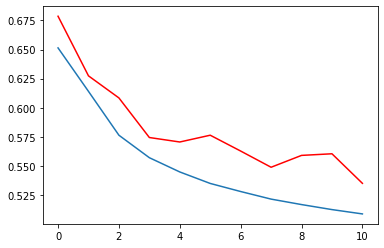

In [28]:
plt.plot(train_losses)
plt.plot(val_losses, 'r')

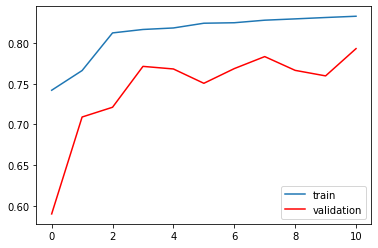

In [29]:
plt.plot(train_accs, label = 'train')
plt.plot(val_accs, label = 'validation', color='r')
plt.legend()

# Тест

## Метрики

In [ ]:
accuracy = torchmetrics.Accuracy()
f1 = torchmetrics.F1(2)
confmat = torchmetrics.ConfusionMatrix(num_classes=2)
aucroc = torchmetrics.AUROC(num_classes=2)

In [6]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

Загружаем веса интересующей модели следующим образом.

In [ ]:
model = LeNet()
model.load_state_dict(torch.load('/content/model_1.pt', map_location=torch.device('cpu')))

Результаты тестирования.

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
model.eval()
losses = []
accs = []
f1s = []
aucrocs = []

for x, target in test_loader:
  pred = model(x)
  loss = loss_fn(pred, target)
  losses.append(loss.item())
  accs.append(accuracy(torch.argmax(pred, 1), target).item())
  f1s.append(f1(torch.argmax(pred, 1), target).item())
  aucrocs.append(aucroc(pred[:, 1], target).item())

In [ ]:
print(f'Функция потерь на тестовом датасете: {np.mean(losses)}')
print(f'Точность на тестовом датасете: {np.mean(accs)}')
print(f'F1 на тестовом датасете: {np.mean(f1s)}')
print(f'AUC-ROC на тестовом датасете: {np.mean(aucrocs)}')

## Визуализация результатов

In [42]:
to_im = transforms.ToPILImage()

Рассмотрим работу первого сверточного слоя на изображении без NST.

In [43]:
negative_image = test_dataset[0][0]
print('Диагноз:', int(test_dataset[0][1]))

Диагноз: 0


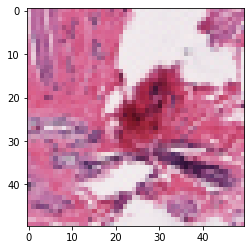

In [44]:
plt.imshow(to_im(negative_image))

In [45]:
conv1_neg_im = model.conv_head[0](negative_image.unsqueeze(0))

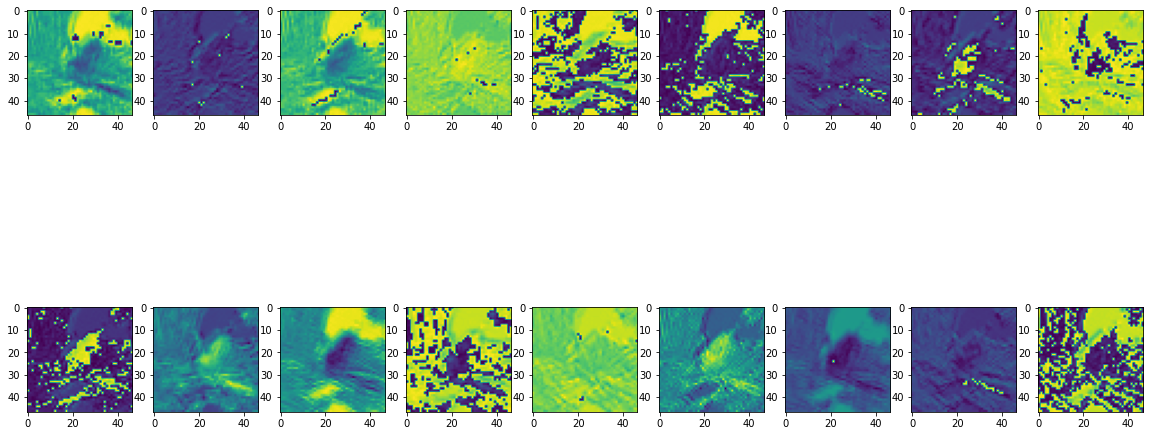

In [46]:
fig, axes = plt.subplots(2, 9, figsize=(20, 10))
for i in range(18):
  axes[i//9, i%9].imshow(to_im(conv1_neg_im[0, i].detach()))

Рассмотрим работу первого сверточного слоя на изображении с NST.

In [28]:
positive_image = test_dataset[8560][0]
print('Диагноз:', int(test_dataset[8000][1]))

Диагноз: 1


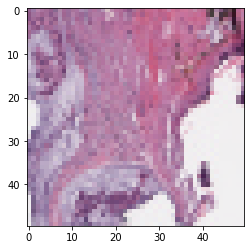

In [29]:
plt.imshow(to_im(positive_image))

In [36]:
conv1_pos_im = model.conv_head[0](positive_image.unsqueeze(0))

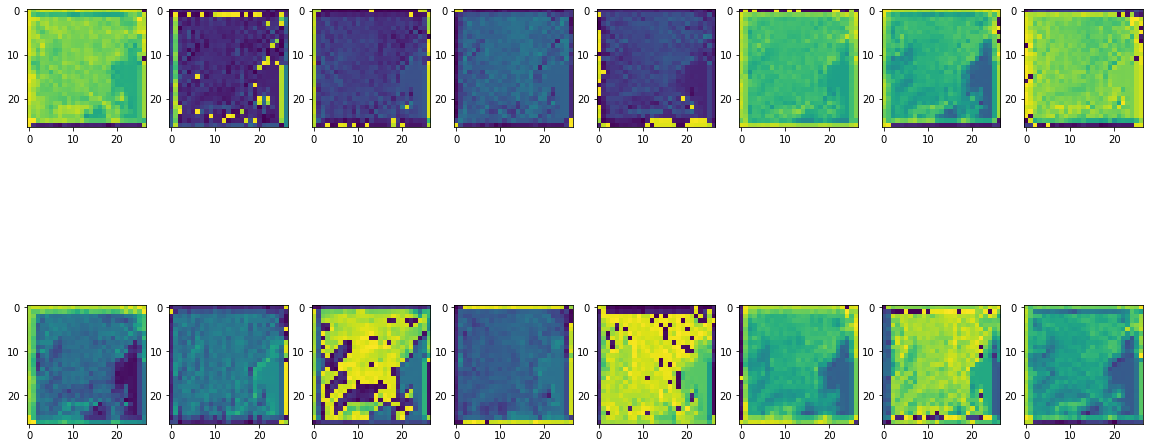

In [38]:
fig, axes = plt.subplots(2, 8, figsize=(20, 10))
for i in range(16):
  axes[i//8, i%8].imshow(to_im(conv1_pos_im[0, i].detach()))